In [55]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.svm import SVC
import nltk
import neattext.functions as nfx
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
#loading data from the dataset
#df=pd.read_csv("AiAssignment/emotion_dataset.csv");
#df1=pd.read_csv("AiAssignment/tweet_emotions.csv");
#Angrydataset=pd.read_csv("AiAssignment/Emotion(angry).csv");
#Saddataset=pd.read_csv("AiAssignment/Emotion(sad).csv");
#Happydataset=pd.read_csv("AiAssignment/Emotion(happy).csv");

#Joining the 3 dataset to be interpreted as 1 dataset

#emotions=[Angrydataset,Saddataset,Happydataset]

#dataset=pd.concat(emotions)

#preview dataset
#df.head()
#df1.head()

#df.isnull().sum()

#loading in the dataset

Depressiondataset=pd.read_csv("AiAssignment/dataset/Suicide_Detection.csv");

#displaying only the top 5 information from the dataset
Depressiondataset.head()



,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [2]:
#value counts of the suicide and non suicide from the dataset
Depressiondataset['class'].value_counts()

non-suicide    116037
suicide        116037
Name: class, dtype: int64

In [3]:
#checking for missing values in the dataset
Depressiondataset.isnull().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

In [4]:
#checking the data types of the data in the dataset
Depressiondataset.dtypes

Unnamed: 0     int64
text          object
class         object
dtype: object

In [5]:
#dropping the unnamed column since we wont be needing it for our model and displaying the top 5 information 
# after ther unnamed column has been dropped. 
Depressiondataset.drop('Unnamed: 0',axis=1,inplace=True)
Depressiondataset.head()


,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


<AxesSubplot:xlabel='class', ylabel='count'>

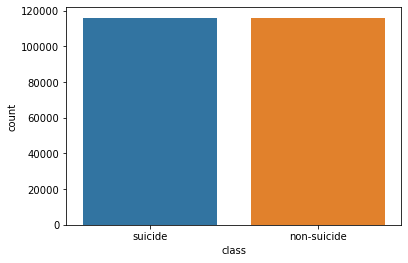

In [6]:
#ploting suicide and non suicide data from the dataset using Seaborn  to checheck if our data is balanced 
#or not balanced
sns.countplot(x='class',data=Depressiondataset)

In [7]:
#sentiment analysis
from textblob import TextBlob

In [13]:
#a function that uses TextBlob to do sentiment analysis from texts.
def emotion(sentence):
    blob=TextBlob(sentence)
    sentiment1=blob.sentiment.polarity
    
    if sentiment1>0:
        result="Positive"
    elif sentiment1<0:
        result="Negative"
    else:
        result="Neutral"
    
    return result

#Mapping the emotion function to the dataset and see which text is either positive, negative or neutral 
Depressiondataset['Sentiment']=Depressiondataset['text'].apply(emotion)


In [14]:
#Displaying the first 5 information to see the newly mapped dataset using the emotion function 
Depressiondataset.head()

,text,class,Sentiment
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,Positive
1,Am I weird I don't get affected by compliments...,non-suicide,Positive
2,Finally 2020 is almost over... So I can never ...,non-suicide,Negative
3,i need helpjust help me im crying so hard,suicide,Negative
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,Negative


In [15]:
#Comparing information from the class column and the Sentiment column
Depressiondataset.groupby(['class','Sentiment']).size()

class        Sentiment
non-suicide  Negative     39634
             Neutral      19814
             Positive     56589
suicide      Negative     54071
             Neutral       5227
             Positive     56739
dtype: int64

<Figure size 1440x720 with 0 Axes>

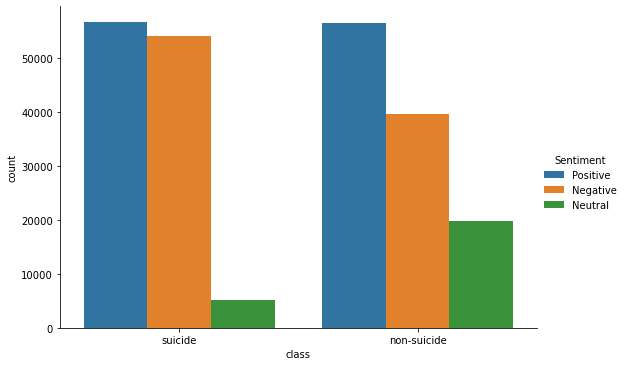

In [19]:
#plot using Seaborn
sns.factorplot
sns.catplot
plt.figure(figsize=(20,10))
sns.catplot(x='class', hue='Sentiment',data=Depressiondataset, kind='count',aspect=1.5)
plt.show()

In [39]:
#Text Cleaning
#Removal of noise like special characters, punctuations, stopwords


Depressiondataset['Clean_Text']=Depressiondataset['text'].apply(nfx.remove_userhandles)

Depressiondataset['Clean_Text']=Depressiondataset['Clean_Text'].apply(nfx.remove_emojis)

Depressiondataset['Clean_Text']=Depressiondataset['Clean_Text'].apply(nfx.remove_punctuations)

Depressiondataset[['text','Clean_Text']]



,text,Clean_Text
0,Ex Wife Threatening SuicideRecently I left my ...,Ex Wife Threatening SuicideRecently I left my ...
1,Am I weird I don't get affected by compliments...,Am I weird I dont get affected by compliments ...
2,Finally 2020 is almost over... So I can never ...,Finally 2020 is almost over So I can never hea...
3,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",I’m so lostHello my name is Adam (16) and I’ve...
...,...,...
232069,If you don't like rock then your not going to ...,If you dont like rock then your not going to g...
232070,You how you can tell i have so many friends an...,You how you can tell i have so many friends an...
232071,pee probably tastes like salty tea😏💦‼️ can som...,pee probably tastes like salty tea‼ can someon...
232072,The usual stuff you find hereI'm not posting t...,The usual stuff you find hereIm not posting th...


In [52]:
#a function that extracts keywords
def keywords(text,number=100):
    token1=[token for token in text.split()]
    common=Counter(token1).most_common(number)
    return dict(common)

#making a list of common words from the class column, particularly suicide

suicideWords=Depressiondataset[Depressiondataset['class']=='suicide']['Clean_Text'].tolist()

suicideDocx=' '.join(suicideWords)

#extracting keyword
keywordSui=keywords(suicideDocx)

keywordSui

{'I': 1277139,
 'to': 841590,
 'and': 674339,
 'the': 477196,
 'a': 453888,
 'my': 452317,
 'of': 343961,
 'me': 334829,
 'it': 271318,
 'that': 263347,
 'in': 241205,
 'have': 213183,
 'for': 210813,
 'is': 201617,
 'just': 194511,
 'but': 190490,
 'Im': 181237,
 'was': 168093,
 'this': 164853,
 'i': 162651,
 'with': 159132,
 'be': 152183,
 'so': 146711,
 'dont': 136714,
 'want': 126942,
 'like': 126104,
 'do': 120901,
 'not': 119963,
 'on': 117850,
 'feel': 107044,
 'life': 106011,
 'myself': 105573,
 'know': 105475,
 'about': 103327,
 'all': 103240,
 'or': 94682,
 'at': 92052,
 'out': 91719,
 'you': 89286,
 'up': 85782,
 'because': 85481,
 'get': 83490,
 'am': 83271,
 'been': 82486,
 'no': 80274,
 'if': 79250,
 'as': 74444,
 'her': 74173,
 'what': 73470,
 'even': 70588,
 'had': 69287,
 'time': 68574,
 'cant': 68503,
 'would': 68212,
 'Ive': 67963,
 'people': 66950,
 'will': 64372,
 'they': 64362,
 'now': 64108,
 'one': 63819,
 'really': 63697,
 'can': 63400,
 'she': 62580,
 'when': 

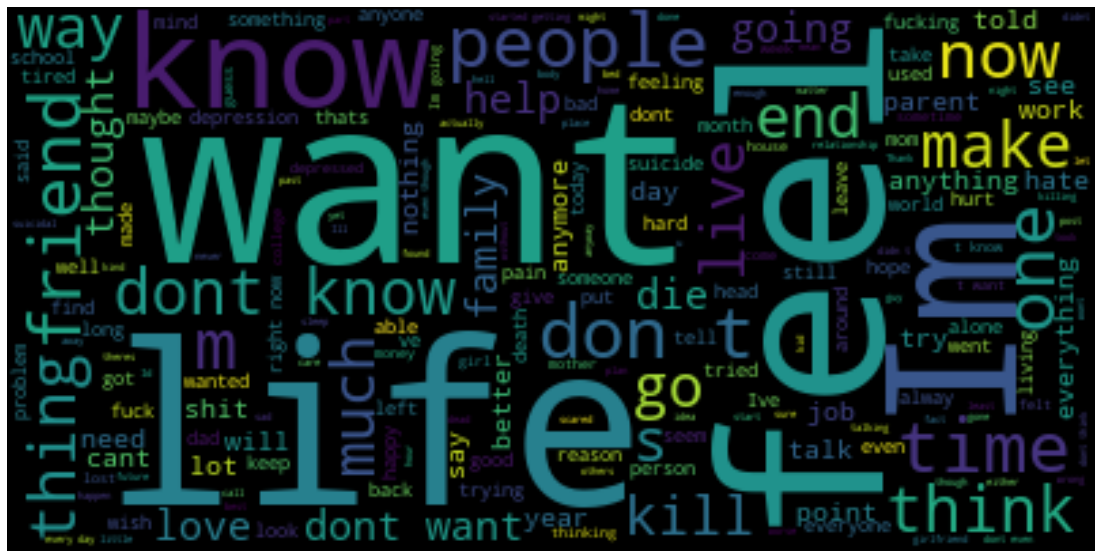

In [56]:
def words(docx):
    wordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

words(suicideDocx)

In [25]:
#Algorithm implementation
#Building Features from the cleaned Text in the dataset

Xfeatures=Depressiondataset['Clean_Text']
ylabels=Depressiondataset['class']


#Vectorizer

cv=CountVectorizer()
X=cv.fit_transform(Xfeatures)

#To Dense Array (Numpy)
#X.toarray()

#split dataset into test data and train data
X_train,X_test,y_train,y_test=train_test_split(X,ylabels,test_size=0.3,random_state=42)



In [27]:
##testing prediction by first vectorizing the sentence and apply the model
sentence=[" I am sad "]

vect =cv.transform(sentence).toarray()

#building model using naive bayes 
nv_model= MultinomialNB()
nv_model.fit(X_train,y_train)

#Checking for accuracy
print("Accuracy: ",nv_model.score(X_test,y_test))

#Predictions
y_pred_for_nv_model=nv_model.predict(X_test)
y_pred_for_nv_model

#evaluation of the naive bayes 
print(classification_report(y_test,y_pred_for_nv_model))

#Make Prediction
print("model prediction: ",nv_model.predict(vect))

#percentage of prediction, accuracy? confidence score
print("Prediction Accuracy:",nv_model.predict_proba(vect) )

Accuracy:  0.897964753027017
              precision    recall  f1-score   support

 non-suicide       0.95      0.84      0.89     34824
     suicide       0.86      0.96      0.90     34799

    accuracy                           0.90     69623
   macro avg       0.90      0.90      0.90     69623
weighted avg       0.90      0.90      0.90     69623

model prediction:  ['suicide']
Prediction Accuracy: [[0.4175536 0.5824464]]


In [32]:
#a function that will be used to test the prediction of the models
def predict_emotion(sentence,model):
    myvect=cv.transform(my_text).toarray()
    prediction=model.predict(myvect)#make prediction using the model
    pred_proba=model.predict_proba(myvect)
    pred_percentage_for_all=dict(zip(model.classes_,pred_proba))
    print("Prediction:{},Prediction Score{}".format(prediction[0],np.max(pred_proba)))#np.max is to get the percetage for each and every prediction
    return pred_percentage_for_all

predict_emotion(sentence,nv_model)

Prediction:suicide,Prediction Score0.6910199290998117


{'non-suicide': array([0.30898007, 0.69101993])}

Accuracy:  0.897964753027017
              precision    recall  f1-score   support

 non-suicide       0.95      0.84      0.89     34824
     suicide       0.86      0.96      0.90     34799

    accuracy                           0.90     69623
   macro avg       0.90      0.90      0.90     69623
weighted avg       0.90      0.90      0.90     69623



In [33]:
#building model using Logistic Regression
lg_model= LogisticRegression(solver='lbfgs', max_iter=100000)
lg_model.fit(X_train,y_train)

#Checking for accuracy
print("Accuracy: ",lg_model.score(X_test,y_test))


#Make Prediction
print("Logistic Regression model prediction: ",lg_model.predict(vect))

#percentage of prediction, accuracy? confidence score
print("Logistic Regression percentage of prediction, accuracy? confidence score::",lg_model.predict_proba(vect) )


#evaluation of Logistic Regression
y_pred_for_log_model=lg_model.predict(X_test)
print(classification_report(y_test,y_pred_for_log_model))



Accuracy:  0.9361274291541588
Logistic Regression model prediction:  ['non-suicide']
Logistic Regression percentage of prediction, accuracy? confidence score:: [[0.85422268 0.14577732]]
              precision    recall  f1-score   support

 non-suicide       0.92      0.96      0.94     34824
     suicide       0.96      0.91      0.93     34799

    accuracy                           0.94     69623
   macro avg       0.94      0.94      0.94     69623
weighted avg       0.94      0.94      0.94     69623



In [34]:
Bernoulli_Model=BernoulliNB()
Bernoulli_Model.fit(X_train,y_train)

#Checking for accuracy
print("Accuracy: ",Bernoulli_Model.score(X_test,y_test))



#Make Prediction
print("BernoulliNB model prediction: ",Bernoulli_Model.predict(vect))

#percentage of prediction, accuracy? confidence score
print("BernoulliNB percentage of prediction, accuracy? confidence score:",Bernoulli_Model.predict_proba(vect) )

#evaluation of BernoulliNB
y_pred_for_BernoulliNB_model=Bernoulli_Model.predict(X_test)
print(classification_report(y_test,y_pred_for_BernoulliNB_model))


Accuracy:  0.7784927394682791
BernoulliNB model prediction:  ['non-suicide']
BernoulliNB percentage of prediction, accuracy? confidence score: [[1.00000000e+00 1.33642226e-35]]
              precision    recall  f1-score   support

 non-suicide       0.73      0.89      0.80     34824
     suicide       0.86      0.66      0.75     34799

    accuracy                           0.78     69623
   macro avg       0.79      0.78      0.78     69623
weighted avg       0.79      0.78      0.78     69623



In [35]:

from sklearn.tree import DecisionTreeClassifier
decision_Tree_Model = DecisionTreeClassifier( random_state=0)
decision_Tree_Model.fit(X_train,y_train)

#Checking for accuracy
print("Accuracy: ",decision_Tree_Model.score(X_test,y_test))


#Make Prediction
print("decision_Tree_Model  prediction: ",decision_Tree_Model.predict(vect))

#percentage of prediction, accuracy? confidence score
print("decision_Tree_Model percentage of prediction, accuracy? confidence score:",decision_Tree_Model.predict_proba(vect) )

#evaluation of Decision Tree
y_pred_for_DecisionTree_model=decision_Tree_Model.predict(X_test)
print(classification_report(y_test,y_pred_for_DecisionTree_model))



Accuracy:  0.8554644298579492
decision_Tree_Model  prediction:  ['non-suicide']
decision_Tree_Model percentage of prediction, accuracy? confidence score: [[1. 0.]]
              precision    recall  f1-score   support

 non-suicide       0.85      0.86      0.86     34824
     suicide       0.86      0.85      0.85     34799

    accuracy                           0.86     69623
   macro avg       0.86      0.86      0.86     69623
weighted avg       0.86      0.86      0.86     69623



In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
sgd = SGDClassifier()

sgd.fit(X_train,y_train)


#Checking for accuracy
print("Accuracy: ",sgd.score(X_test,y_test))

#Make Prediction
print("SGDClassifier model  prediction: ",sgd.predict(vect))


#evaluation of SGDClassifier
y_pred_for_SGDClassifier_model=sgd.predict(X_test)
print(classification_report(y_test,y_pred_for_SGDClassifier_model))


Accuracy:  0.9161627623055599
SGDClassifier model  prediction:  ['non-suicide']
              precision    recall  f1-score   support

 non-suicide       0.88      0.96      0.92     34824
     suicide       0.95      0.88      0.91     34799

    accuracy                           0.92     69623
   macro avg       0.92      0.92      0.92     69623
weighted avg       0.92      0.92      0.92     69623



In [ ]:
#building model using SVM 
sv_model= SVM(kernel ='linear', C = 1)
sv_model.fit(X_train,y_train)


#Checking for accuracy
print("Accuracy: ",sv_model.score(X_test,y_test))

#Make Prediction
print("SVC model prediction: ",sv_model.predict(vect))

#percentage of prediction, accuracy? confidence score
print("SVC percentage of prediction, accuracy? confidence score:",sv_model.predict_proba(vect) )

#evaluation of SVM
#Predictions
y_pred_for_sv_model=sv_model.predict(X_test)
y_pred_for_sv_model
print(classification_report(y_test,y_pred_for_sv_model))


svc = svm.SVC(kernel ='linear', C = 1).fit(X, y)
 

In [ ]:
from keras.callbacks import EarlyStopping
# Create the model
lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.SpatialDropout1D(0.3),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])
lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])




# Apply tokenizer and text to sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(X_train) 
tokenizer.fit_on_texts(X_test)
seq_train = tokenizer.texts_to_sequences(X_train)
seq_val = tokenizer.texts_to_sequences(X_test)
pad_train = pad_sequences(seq_train) 
pad_val = pad_sequences(seq_val)



history = lstm.fit(X_train, y_train, epochs=100, callbacks=[es],
                   validation_data=(X_test, y_test), verbose=2, batch_size=100)
#Checking for accuracy
print("Accuracy: ",lstm.score(X_test,y_test))


In [ ]:
#Use pickle to save our model so that we can use it later

import pickle
# # Saving model to disk
#pickle.dump(lg_model, open('lgmodel.pkl','wb'))
model=pickle.load(open('lgmodel.pkl','rb'))
#with open('cv.pickle', 'wb') as handle:
#   pickle.dump(cv, handle, protocol=pickle.HIGHEST_PROTOCOL)
#model.predict([["i am happy"]])
#predict_emotion(['i want to die'],model)


In [ ]:
#Use pickle to save our model so that we can use it later

import pickle
# # Saving model to disk
pickle.dump(nv_model, open('Naivemodel.pkl','wb'))
naivemodel=pickle.load(open('Naivemodel.pkl','rb'))
#with open('cv.pickle', 'wb') as handle:
#   pickle.dump(cv, handle, protocol=pickle.HIGHEST_PROTOCOL)
#model.predict([["i am happy"]])
predict_emotion(['i want to die'],naivemodel)
